In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(28, 28)

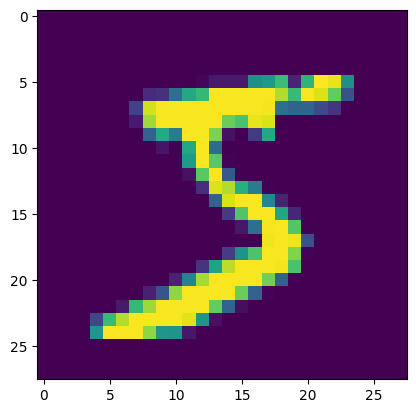

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
plt.imshow(X_train[0])
y_train[0]
X_train[1].shape

In [16]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [25]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer = 'Adam', 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

In [27]:
model.fit(X_train_flatten, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8853 - loss: 5.5498
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 5.4391
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8859 - loss: 5.2508


## Scaling the values to improve the accuracy

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [32]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer = 'Adam', 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

In [33]:
model.fit(X_train_flatten, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8059 - loss: 0.7284
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9122 - loss: 0.3160
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9197 - loss: 0.2880


In [34]:
val_loss, val_acc = model.evaluate(X_test_flatten, y_test, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9098 - loss: 0.3144


In [37]:
predictions = model.predict(X_test_flatten)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(10000, 10)

7


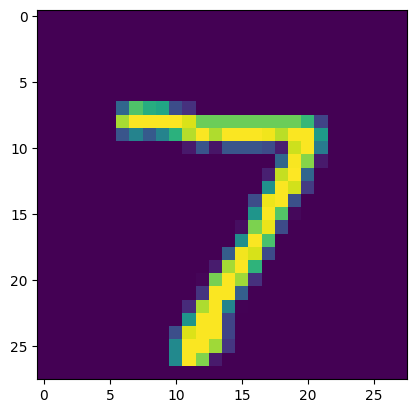

In [43]:
import numpy as np

print(np.argmax(predictions[0]))
plt.imshow(X_test[0])

In [45]:
y_predicted = [np.argmax(i) for i in predictions]

Text(95.72222222222221, 0.5, 'Truth')

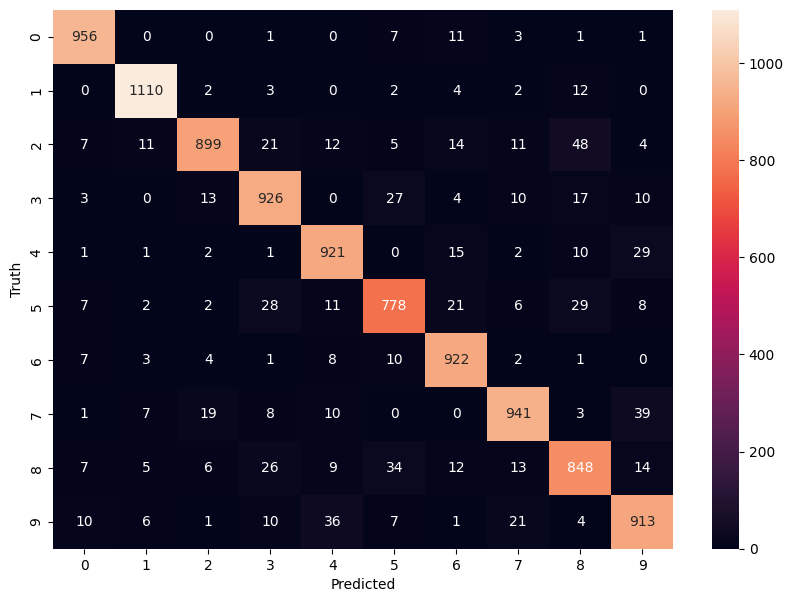

In [55]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Lets add a hidden layer to enhance the performance of the model

In [63]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # used flatten layer to ocnvert the input form 2d to 1d
    keras.layers.Dense(99, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'Adam', 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8738 - loss: 0.4544
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9633 - loss: 0.1294
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0869


In [66]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1132


In [67]:
predictions = model.predict(X_test)
predictions.shape

y_predicted = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

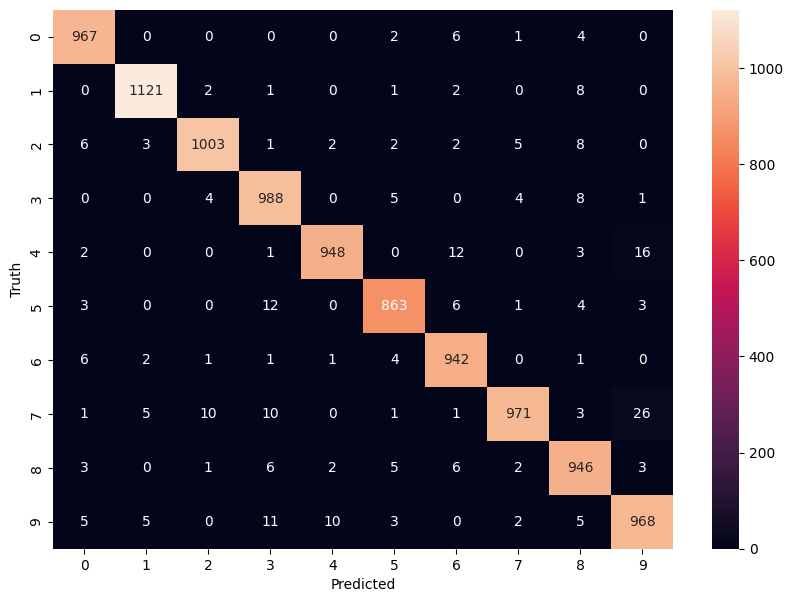

In [65]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')